DATA PREPROCESSING

Training data: (2906, 8)
Test data: (132, 15)

Loading tokenizer: SZTAKI-HLT/hubert-base-cc


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

✓ Tokenizer loaded successfully!
  Vocabulary size: 32001
  Model max length: 1000000000000000019884624838656
TOKENIZING TEXTS TO ANALYZE TOKEN LENGTHS

Token-level statistics:
Train - Mean: 82.6, Median: 62.0
Train - Min: 10, Max: 1743
Test  - Mean: 65.9, Median: 57.5
Test  - Min: 14, Max: 186

Training token length percentiles:
   50th percentile: 62 tokens
   75th percentile: 99 tokens
   90th percentile: 153 tokens
   95th percentile: 200 tokens
   99th percentile: 390 tokens
  100th percentile: 1743 tokens
COVERAGE ANALYSIS FOR DIFFERENT max_length VALUES

max_length = 128:
  Train coverage: 85.00% (436 texts truncated)
  Test coverage:  92.42% (10 texts truncated)

max_length = 256:
  Train coverage: 97.18% (82 texts truncated)
  Test coverage:  100.00% (0 texts truncated)

max_length = 512:
  Train coverage: 99.38% (18 texts truncated)
  Test coverage:  100.00% (0 texts truncated)
TOKENIZING DATASETS

Tokenizing training data...
✓ Training data tokenized: 2906 samples
Tokenizing

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SZTAKI-HLT/hubert-base-cc and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Model loaded to cuda
  Total parameters: 110,621,957
  Trainable parameters: 110,621,957

✓ Focal Loss (gamma=2.5) with class weights
  Class weights (0-indexed): [np.float64(4.403030303030303), np.float64(1.8276729559748428), np.float64(0.9167192429022082), np.float64(0.6283243243243243), np.float64(0.6479375696767001)]
✓ Logging to: ../logs/training_log_20251205_214614.txt
STARTING TRAINING

EPOCH 1/6


Epoch 1: 100%|██████████| 146/146 [01:36<00:00,  1.52it/s, loss=1.2451, acc=0.2539]



Train Loss: 1.5110, Train Acc: 0.2539


Eval Val (Epoch 1): 100%|██████████| 37/37 [00:07<00:00,  4.79it/s]


Val Loss:   0.8522, Val Acc:   0.1993
✓ Best model saved! (Val Acc: 0.1993)

EPOCH 2/6


Epoch 2: 100%|██████████| 146/146 [01:36<00:00,  1.52it/s, loss=0.4565, acc=0.4535]



Train Loss: 0.7348, Train Acc: 0.4535


Eval Val (Epoch 2): 100%|██████████| 37/37 [00:07<00:00,  4.74it/s]


Val Loss:   0.9254, Val Acc:   0.2698
✓ Best model saved! (Val Acc: 0.2698)

EPOCH 3/6


Epoch 3: 100%|██████████| 146/146 [01:36<00:00,  1.51it/s, loss=0.3278, acc=0.5611]



Train Loss: 0.4175, Train Acc: 0.5611


Eval Val (Epoch 3): 100%|██████████| 37/37 [00:07<00:00,  4.73it/s]


Val Loss:   0.9839, Val Acc:   0.3952
✓ Best model saved! (Val Acc: 0.3952)

EPOCH 4/6


Epoch 4: 100%|██████████| 146/146 [01:36<00:00,  1.52it/s, loss=0.0612, acc=0.6545]



Train Loss: 0.2688, Train Acc: 0.6545


Eval Val (Epoch 4): 100%|██████████| 37/37 [00:07<00:00,  4.73it/s]


Val Loss:   1.0747, Val Acc:   0.4038
✓ Best model saved! (Val Acc: 0.4038)

EPOCH 5/6


Epoch 5: 100%|██████████| 146/146 [01:36<00:00,  1.52it/s, loss=0.0870, acc=0.6915]



Train Loss: 0.1731, Train Acc: 0.6915


Eval Val (Epoch 5): 100%|██████████| 37/37 [00:07<00:00,  4.74it/s]


Val Loss:   1.1707, Val Acc:   0.4399
✓ Best model saved! (Val Acc: 0.4399)

EPOCH 6/6


Epoch 6: 100%|██████████| 146/146 [01:36<00:00,  1.52it/s, loss=0.0962, acc=0.7332]



Train Loss: 0.1416, Train Acc: 0.7332


Eval Val (Epoch 6): 100%|██████████| 37/37 [00:07<00:00,  4.73it/s]


Val Loss:   1.1923, Val Acc:   0.4261

TRAINING COMPLETE!
Best validation accuracy: 0.4399 (Epoch 5)
PART 3: FINAL EVALUATION AND ANALYSIS


Eval Final Val: 100%|██████████| 37/37 [00:07<00:00,  4.75it/s]



Classification Report (Validation Set):
              precision    recall  f1-score   support

     Class 1     0.5000    0.2308    0.3158        26
     Class 2     0.2447    0.3594    0.2911        64
     Class 3     0.3179    0.4882    0.3851       127
     Class 4     0.4533    0.1838    0.2615       185
     Class 5     0.6359    0.7278    0.6788       180

    accuracy                         0.4399       582
   macro avg     0.4304    0.3980    0.3865       582
weighted avg     0.4594    0.4399    0.4232       582



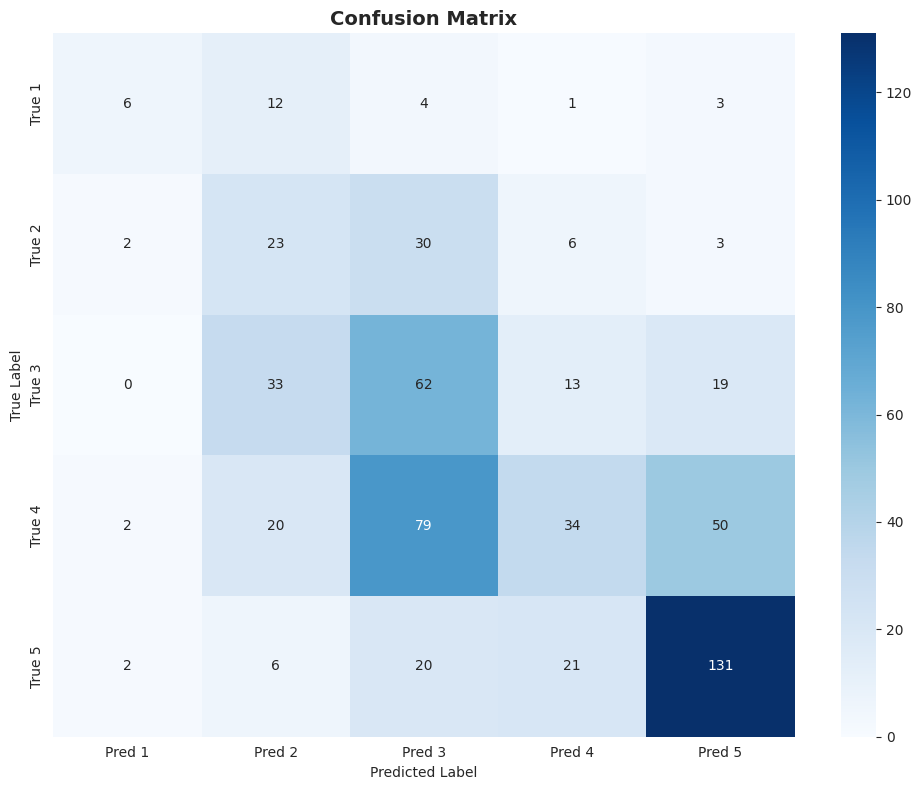

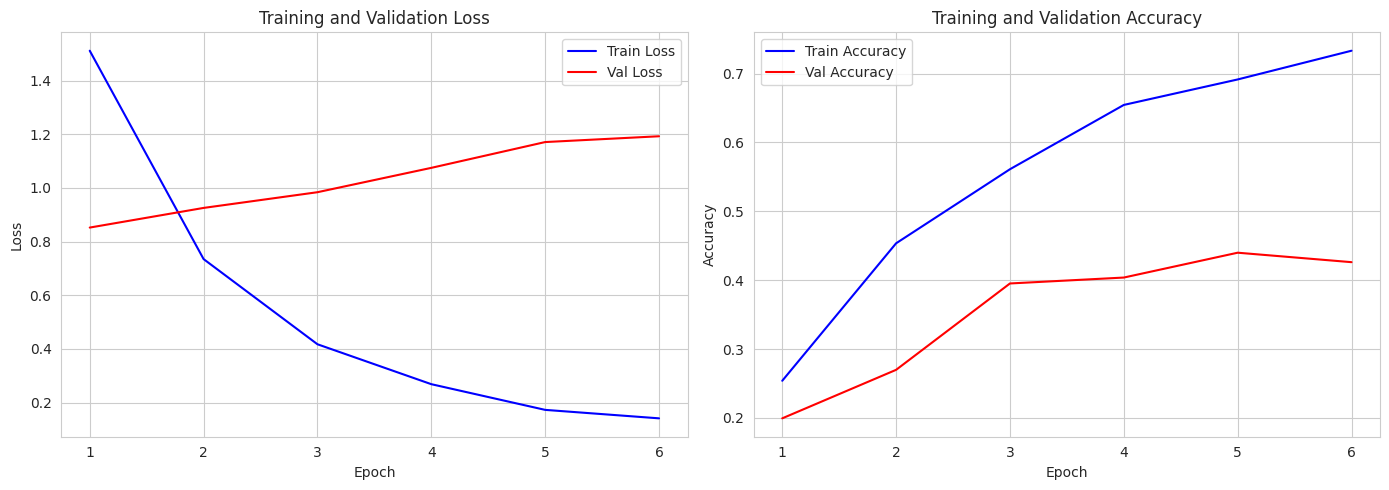

SCRIPT COMPLETE!

Results saved to:
  Preprocessed data: /content/../_data/preprocessed
  Best model: /content/../models/model_best.pt
  Training log: /content/../logs/training_log_20251205_214614.txt


In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.optim import AdamW
from pathlib import Path
from tqdm import tqdm
import seaborn as sns
import torch.nn as nn
import pandas as pd
import numpy as np
import warnings
import datetime
import pickle
import torch
import yaml

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

model_name = 'SZTAKI-HLT/hubert-base-cc'
tokenizer_model_name = 'SZTAKI-HLT/hubert-base-cc'
BATCH_SIZE = 16
LEARNING_RATE = 2e-5
NUM_EPOCHS = 6
ACCUMULATION_STEPS = 2
MAX_LENGTH = 256 # max length of tokenizer

print("DATA PREPROCESSING")
print("="*80)

# Load training and test data
train_path = Path('/content/sample_data/train.csv')
test_path = Path('/content/sample_data/test.csv')

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print(f"\nTraining data: {df_train.shape}")
print(f"Test data: {df_test.shape}")

# Load Hungarian BERT tokenizer
print(f"\nLoading tokenizer: {tokenizer_model_name}")
tokenizer = AutoTokenizer.from_pretrained(tokenizer_model_name)

print("✓ Tokenizer loaded successfully!")
print(f"  Vocabulary size: {tokenizer.vocab_size}")
print(f"  Model max length: {tokenizer.model_max_length}")

print("TOKENIZING TEXTS TO ANALYZE TOKEN LENGTHS")
print("="*80)

train_token_lengths = []
for text in df_train['text']:
    tokens = tokenizer.encode(text, add_special_tokens=True)
    train_token_lengths.append(len(tokens))

test_token_lengths = []
for text in df_test['text']:
    tokens = tokenizer.encode(text, add_special_tokens=True)
    test_token_lengths.append(len(tokens))

train_token_lengths = np.array(train_token_lengths)
test_token_lengths = np.array(test_token_lengths)

print("\nToken-level statistics:")
print(f"Train - Mean: {train_token_lengths.mean():.1f}, Median: {np.median(train_token_lengths):.1f}")
print(f"Train - Min: {train_token_lengths.min()}, Max: {train_token_lengths.max()}")
print(f"Test  - Mean: {test_token_lengths.mean():.1f}, Median: {np.median(test_token_lengths):.1f}")
print(f"Test  - Min: {test_token_lengths.min()}, Max: {test_token_lengths.max()}")

# Token length percentiles
print("\nTraining token length percentiles:")
for p in [50, 75, 90, 95, 99, 100]:
    val = np.percentile(train_token_lengths, p)
    print(f"  {p:3d}th percentile: {val:.0f} tokens")

print("COVERAGE ANALYSIS FOR DIFFERENT max_length VALUES")
print("="*80)
for max_len in [128, 256, 512]:
    train_coverage = (train_token_lengths <= max_len).sum() / len(train_token_lengths) * 100
    test_coverage = (test_token_lengths <= max_len).sum() / len(test_token_lengths) * 100
    train_truncated = (train_token_lengths > max_len).sum()
    test_truncated = (test_token_lengths > max_len).sum()
    print(f"\nmax_length = {max_len}:")
    print(f"  Train coverage: {train_coverage:.2f}% ({train_truncated} texts truncated)")
    print(f"  Test coverage:  {test_coverage:.2f}% ({test_truncated} texts truncated)")

print("TOKENIZING DATASETS")
print("="*80)

def tokenize_texts(texts, labels, tokenizer, max_length):
    """
    Tokenize texts and prepare them for BERT model.

    Returns:
        Dictionary with input_ids, attention_mask, and labels
    """
    encodings = tokenizer(
        texts.tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors=None  # Return lists, not tensors (for flexibility)
    )

    return {
        'input_ids': encodings['input_ids'],
        'attention_mask': encodings['attention_mask'],
        'labels': labels.tolist()
    }

# Tokenize training data
print("\nTokenizing training data...")
train_encodings = tokenize_texts(
    df_train['text'].values,
    df_train['label_numeric'].values,
    tokenizer,
    MAX_LENGTH
)
print(f"✓ Training data tokenized: {len(train_encodings['input_ids'])} samples")

# Tokenize test data
print("Tokenizing test data...")
test_encodings = tokenize_texts(
    df_test['text'].values,
    df_test['label_numeric'].values,
    tokenizer,
    MAX_LENGTH
)
print(f"✓ Test data tokenized: {len(test_encodings['input_ids'])} samples")

print("VERIFICATION")
print("="*80)
print("\nTraining set:")
print(f"  input_ids shape: {len(train_encodings['input_ids'])} × {len(train_encodings['input_ids'][0])}")
print(f"  attention_mask shape: {len(train_encodings['attention_mask'])} × {len(train_encodings['attention_mask'][0])}")
print(f"  labels: {len(train_encodings['labels'])} samples")

print("\nTest set:")
print(f"  input_ids shape: {len(test_encodings['input_ids'])} × {len(test_encodings['input_ids'][0])}")
print(f"  attention_mask shape: {len(test_encodings['attention_mask'])} × {len(test_encodings['attention_mask'][0])}")
print(f"  labels: {len(test_encodings['labels'])} samples")

print("EXAMPLE: First Training Sample")
print("="*80)
print("\nOriginal text (first 100 chars):")
print(f"  {df_train.iloc[0]['text'][:100]}...")
print(f"\nLabel: {df_train.iloc[0]['label_numeric']} ({df_train.iloc[0]['label_text']})")
print("\nTokenized (first 20 tokens):")
print(f"  input_ids: {train_encodings['input_ids'][0][:20]}")
print(f"  attention_mask: {train_encodings['attention_mask'][0][:20]}")
print("\nDecoded tokens (first 10):")
tokens = tokenizer.convert_ids_to_tokens(train_encodings['input_ids'][0][:10])
print(f"  {tokens}")

# Compute class weights
unique_labels = np.unique(df_train['label_numeric'])
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=unique_labels,
    y=df_train['label_numeric']
)
class_weights_dict = dict(zip(unique_labels, class_weights))

print("\n" + "="*80)
print("Computed class weights:")
for label, weight in class_weights_dict.items():
    print(f"  Class {label}: {weight:.4f}")

print("CREATING TRAIN/VALIDATION SPLIT")
print("="*80)

# Create validation split (80/20 split, stratified by label)
train_indices, val_indices = train_test_split(
    range(len(train_encodings['input_ids'])),
    test_size=0.2,
    random_state=42,
    stratify=train_encodings['labels']
)

print("\nSplit sizes:")
print(f"  Training:   {len(train_indices)} samples ({len(train_indices)/len(train_encodings['input_ids'])*100:.1f}%)")
print(f"  Validation: {len(val_indices)} samples ({len(val_indices)/len(train_encodings['input_ids'])*100:.1f}%)")
print(f"  Test:       {len(test_encodings['input_ids'])} samples")

# Create separate datasets
train_dataset = {
    'input_ids': [train_encodings['input_ids'][i] for i in train_indices],
    'attention_mask': [train_encodings['attention_mask'][i] for i in train_indices],
    'labels': [train_encodings['labels'][i] for i in train_indices]
}

val_dataset = {
    'input_ids': [train_encodings['input_ids'][i] for i in val_indices],
    'attention_mask': [train_encodings['attention_mask'][i] for i in val_indices],
    'labels': [train_encodings['labels'][i] for i in val_indices]
}

# Verify label distribution in splits
print("\nLabel distribution after split:")
print("\nTraining:")
train_labels_dist = pd.Series(train_dataset['labels']).value_counts().sort_index()
for label, count in train_labels_dist.items():
    pct = (count / len(train_dataset['labels'])) * 100
    print(f"  Class {label}: {count:4d} samples ({pct:5.2f}%)")

print("\nValidation:")
val_labels_dist = pd.Series(val_dataset['labels']).value_counts().sort_index()
for label, count in val_labels_dist.items():
    pct = (count / len(val_dataset['labels'])) * 100
    print(f"  Class {label}: {count:4d} samples ({pct:5.2f}%)")

print("SAVING PREPROCESSED DATA")
print("="*80)

output_dir = Path('../_data/preprocessed')
output_dir.mkdir(parents=True, exist_ok=True)

# Save datasets
with open(output_dir / 'train_dataset.pkl', 'wb') as f:
    pickle.dump(train_dataset, f)
print(f"✓ Saved: train_dataset.pkl ({len(train_dataset['labels'])} samples)")

with open(output_dir / 'val_dataset.pkl', 'wb') as f:
    pickle.dump(val_dataset, f)
print(f"✓ Saved: val_dataset.pkl ({len(val_dataset['labels'])} samples)")

with open(output_dir / 'test_dataset.pkl', 'wb') as f:
    pickle.dump(test_encodings, f)
print(f"✓ Saved: test_dataset.pkl ({len(test_encodings['labels'])} samples)")

# Save class weights
with open(output_dir / 'class_weights.pkl', 'wb') as f:
    pickle.dump(class_weights_dict, f)
print("✓ Saved: class_weights.pkl")

# Save preprocessing config
config = {
    'model_name': tokenizer_model_name,
    'max_length': MAX_LENGTH,
    'train_size': len(train_dataset['labels']),
    'val_size': len(val_dataset['labels']),
    'test_size': len(test_encodings['labels']),
    'num_classes': 5
}

with open(output_dir / 'config.yaml', 'w') as f:
    yaml.dump(config, f, default_flow_style=False, allow_unicode=True)
print("✓ Saved: config.yaml")

print(f"\nAll preprocessed data saved to: {output_dir.absolute()}")

print("PART 2: MODEL TRAINING")
print("="*80)

# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nDevice: {device}")
print(f"PyTorch version: {torch.__version__}")

# Set random seeds
torch.manual_seed(42)
np.random.seed(42)

print("\n✓ Using preprocessed data from Part 1")
print(f"  Train: {len(train_dataset['labels'])} samples")
print(f"  Val: {len(val_dataset['labels'])} samples")
print(f"  Test: {len(test_encodings['labels'])} samples")

# Dataset class
class ASZFDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings['labels'])

    def __getitem__(self, idx):
        item = {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx], dtype=torch.long),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx], dtype=torch.long),
            'labels': torch.tensor(self.encodings['labels'][idx] - 1, dtype=torch.long)  # Convert 1-5 to 0-4
        }
        return item

# Create PyTorch datasets
train_torch_dataset = ASZFDataset(train_dataset)
val_torch_dataset = ASZFDataset(val_dataset)
test_torch_dataset = ASZFDataset(test_encodings)

print("CREATING WEIGHTED SAMPLER FOR BALANCED TRAINING")
print("="*80)

# FIXED: Calculate sample weights using original labels (1-5), not shifted labels
train_labels_original = np.array(train_dataset['labels'])  # Keep as 1-5
class_counts = np.bincount(train_labels_original)[1:]  # Skip index 0, get counts for 1-5
class_weights_for_sampling = 1.0 / class_counts
sample_weights = class_weights_for_sampling[train_labels_original - 1]  # Map 1-5 to indices 0-4

print("\nClass counts in training:")
for i, count in enumerate(class_counts):
    print(f"  Class {i+1}: {count} samples (weight: {class_weights_for_sampling[i]:.4f})")

sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True
)

print("\n✓ Weighted sampler created - will oversample minority classes during training")

print("\nHyperparameters:")
print(f"  Batch size: {BATCH_SIZE} (effective: {BATCH_SIZE * ACCUMULATION_STEPS})")
print(f"  Learning rate: {LEARNING_RATE}")
print(f"  Epochs: {NUM_EPOCHS}")

# DataLoaders - use sampler for training
train_loader = DataLoader(
    train_torch_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler  # Use weighted sampler instead of shuffle
)

val_loader = DataLoader(
    val_torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_loader = DataLoader(
    test_torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print("✓ DataLoaders created with weighted sampling")

# Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.5, reduction='mean'):  # Higher gamma
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, weight=self.alpha, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        else:
            return focal_loss

print(f"LOADING {model_name} MODEL")
print("="*80)

num_labels = config['num_classes']

print(f"\nLoading: {model_name}")

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    hidden_dropout_prob=0.1,
    attention_probs_dropout_prob=0.1,
    problem_type="single_label_classification"
)
model.to(device)

print(f"✓ Model loaded to {device}")

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"  Total parameters: {total_params:,}")
print(f"  Trainable parameters: {trainable_params:,}")

# FIXED: Prepare class weights aligned with 0-indexed labels
class_weights_list = [class_weights_dict[i+1] for i in range(5)]  # Map dict keys 1-5 to list indices 0-4
class_weights_tensor = torch.tensor(class_weights_list, dtype=torch.float).to(device)

criterion = FocalLoss(alpha=class_weights_tensor, gamma=2.5)
print("\n✓ Focal Loss (gamma=2.5) with class weights")
print(f"  Class weights (0-indexed): {class_weights_list}")

# Optimizer with layer-wise learning rate decay
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {
        'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
        'weight_decay': 0.01
    },
    {
        'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
        'weight_decay': 0.0
    }
]
optimizer = AdamW(optimizer_grouped_parameters, lr=LEARNING_RATE)

total_steps = len(train_loader) * NUM_EPOCHS // ACCUMULATION_STEPS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),
    num_training_steps=total_steps
)

# Logging
log_dir = Path('../logs')
log_dir.mkdir(parents=True, exist_ok=True)
timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
log_file = log_dir / f'training_log_{timestamp}.txt'

with open(log_file, 'w') as f:
    f.write("="*80 + "\n")
    f.write("TRAINING\n")
    f.write("="*80 + "\n")
    f.write(f"Model: {model_name}\n")
    f.write(f"Parameters: {total_params:,}\n")
    f.write("Weighted sampling: True\n")
    f.write("Focal Loss gamma: 2.5\n")
    f.write("="*80 + "\n\n")

print(f"✓ Logging to: {log_file}")

# Training functions
def train_epoch(model, dataloader, optimizer, scheduler, criterion, device, epoch, log_file, accum_steps):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    optimizer.zero_grad()

    progress_bar = tqdm(dataloader, desc=f'Epoch {epoch}')

    for batch_idx, batch in enumerate(progress_bar):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss = criterion(logits, labels) / accum_steps  # Scale loss
        loss.backward()

        if (batch_idx + 1) % accum_steps == 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()

        predictions = torch.argmax(logits, dim=1)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

        # FIXED: Accumulate unscaled loss for proper averaging
        total_loss += loss.item() * accum_steps

        progress_bar.set_postfix({
            'loss': f'{loss.item() * accum_steps:.4f}',
            'acc': f'{correct/total:.4f}'
        })

    # FIXED: Handle remaining gradients if batches don't divide evenly by accum_steps
    if len(dataloader) % accum_steps != 0:
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total

    with open(log_file, 'a') as f:
        f.write(f"Epoch {epoch} - Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}\n")

    return avg_loss, accuracy

def evaluate(model, dataloader, criterion, device, split_name, log_file):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc=f'Eval {split_name}'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = criterion(logits, labels)

            predictions = torch.argmax(logits, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
            total_loss += loss.item()

            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total

    with open(log_file, 'a') as f:
        f.write(f"{split_name} - Loss: {avg_loss:.4f}, Acc: {accuracy:.4f}\n")

    return avg_loss, accuracy, np.array(all_predictions), np.array(all_labels)

print("STARTING TRAINING")
print("="*80)

best_val_accuracy = 0.0
best_epoch = 0
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for epoch in range(1, NUM_EPOCHS + 1):
    print(f"\n{'='*80}")
    print(f"EPOCH {epoch}/{NUM_EPOCHS}")
    print(f"{'='*80}")

    train_loss, train_acc = train_epoch(
        model, train_loader, optimizer, scheduler, criterion,
        device, epoch, log_file, ACCUMULATION_STEPS
    )

    print(f"\nTrain Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

    val_loss, val_acc, val_preds, val_labels = evaluate(
        model, val_loader, criterion, device, f"Val (Epoch {epoch})", log_file
    )

    print(f"Val Loss:   {val_loss:.4f}, Val Acc:   {val_acc:.4f}")

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        best_epoch = epoch

        model_dir = Path('../models')
        model_dir.mkdir(parents=True, exist_ok=True)
        best_model_path = model_dir / 'model_best.pt'

        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'val_accuracy': val_acc,
        }, best_model_path)

        print(f"✓ Best model saved! (Val Acc: {val_acc:.4f})")

print(f"\n{'='*80}")
print("TRAINING COMPLETE!")
print(f"Best validation accuracy: {best_val_accuracy:.4f} (Epoch {best_epoch})")

print("PART 3: FINAL EVALUATION AND ANALYSIS")
print("="*80)

# Load best model
checkpoint = torch.load(best_model_path)
model.load_state_dict(checkpoint['model_state_dict'])

val_loss, val_acc, val_preds, val_labels = evaluate(
    model, val_loader, criterion, device, "Final Val", log_file
)

print("\nClassification Report (Validation Set):")
print(classification_report(
    val_labels, val_preds,
    target_names=[f'Class {i}' for i in range(1, 6)],
    digits=4
))

cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Pred {i}' for i in range(1, 6)],
            yticklabels=[f'True {i}' for i in range(1, 6)])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Training history plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

epochs_range = range(1, NUM_EPOCHS + 1)

axes[0].plot(epochs_range, history['train_loss'], 'b-', label='Train Loss')
axes[0].plot(epochs_range, history['val_loss'], 'r-', label='Val Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(epochs_range, history['train_acc'], 'b-', label='Train Accuracy')
axes[1].plot(epochs_range, history['val_acc'], 'r-', label='Val Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training and Validation Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("SCRIPT COMPLETE!")
print("="*80)
print("\nResults saved to:")
print(f"  Preprocessed data: {output_dir.absolute()}")
print(f"  Best model: {best_model_path.absolute()}")
print(f"  Training log: {log_file.absolute()}")